In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
from statsmodels.graphics.regressionplots import influence_plot

In [5]:
import statsmodels.formula.api as smf

In [6]:
import numpy as np

In [7]:
#Read the data
df = pd.read_csv("50_Startups.csv")
df.head() 

,RD,AT,MS,S,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [8]:
df.describe()

,RD,AT,MS,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [9]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RD      50 non-null     float64
 1   AT      50 non-null     float64
 2   MS      50 non-null     float64
 3   S       50 non-null     object 
 4   Profit  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [10]:
#check for missing values
df.isna().sum() 

RD        0
AT        0
MS        0
S         0
Profit    0
dtype: int64

In [11]:
# Correlation Matrix¶

In [12]:
df.corr()  


,RD,AT,MS,Profit
RD,1.000000,0.241955,0.724248,0.972900
AT,0.241955,1.000000,-0.032154,0.200717
MS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [13]:
# Scatterplot between variables along with histograms

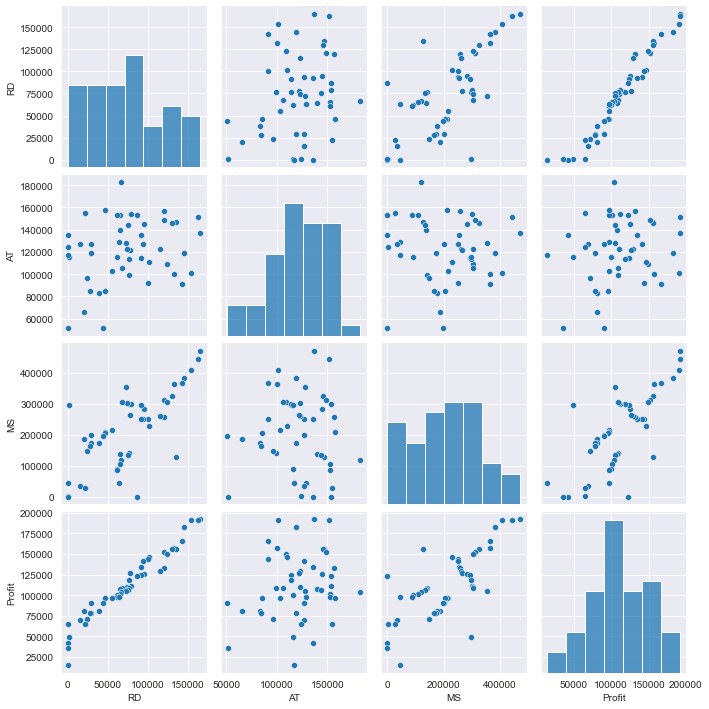

In [14]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(df)

In [15]:
# PREPARING A MODEL

In [16]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Profit~RD+AT+MS',data=df).fit()

In [17]:
#Coefficients
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sat, 12 Nov 2022   Prob (F-statistic):           4.53e-30
Time:                        13:21:03   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD             0.8057      0.045     17.846      0.000       0.715       0.897
AT            -0.0268      0.051     -0.526      0.602      -0.130       0.076
MS             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues) 

Intercept     7.626218
RD           17.846374
AT           -0.525507
MS            1.655077
dtype: float64 
 Intercept    1.057379e-09
RD           2.634968e-22
AT           6.017551e-01
MS           1.047168e-01
dtype: float64


In [19]:
#R squared values
(model.rsquared,model.rsquared_adj) 

(0.9507459940683246, 0.9475337762901719)

In [20]:
#Simple Linear Regression Models


In [21]:
ml_v=smf.ols('Profit~AT',data = df).fit()   
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)  

Intercept    3.040044
AT           1.419493
dtype: float64 
 Intercept    0.003824
AT           0.162217
dtype: float64


In [22]:
ml_w=smf.ols('Profit~MS',data = df).fit()  
print(ml_w.tvalues, '\n', ml_w.pvalues)  

Intercept    7.808356
MS           7.802657
dtype: float64 
 Intercept    4.294735e-10
MS           4.381073e-10
dtype: float64


In [23]:
ml_w=smf.ols('Profit~AT+MS',data = df).fit()  
print(ml_w.tvalues, '\n', ml_w.pvalues)  

Intercept    1.142741
AT           2.467779
MS           8.281039
dtype: float64 
 Intercept    2.589341e-01
AT           1.729198e-02
MS           9.727245e-11
dtype: float64


In [24]:
# Calculating VIF

In [25]:
rsq_rd = smf.ols('RD~AT+MS',data=df).fit().rsquared  
vif_rd = 1/(1-rsq_rd) # 16.33

rsq_at = smf.ols('AT~RD+MS',data=df).fit().rsquared  
vif_at = 1/(1-rsq_at) # 564.98

rsq_ms = smf.ols('MS~RD+AT',data=df).fit().rsquared  
vif_ms= 1/(1-rsq_ms) #  564.84

# Storing vif values in a data frame
d1 = {'Variables':['RD','AT','MS'],'VIF':[vif_rd,vif_at,vif_ms,]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,RD,2.468903
1,AT,1.175091
2,MS,2.326773


In [26]:
 # Residual Analysis

In [27]:
 #Test for Normality of Residuals (Q-Q Plot)

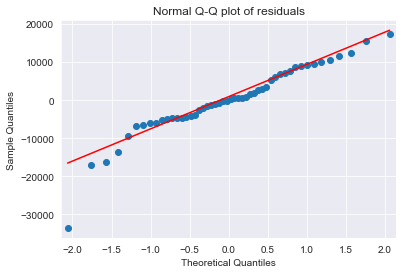

In [28]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [29]:
list(np.where(model.resid>10)) 

[array([ 1,  2,  3,  8, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36,
        37, 38, 40, 41, 42, 43, 44, 45], dtype=int64)]

In [30]:
#Residual Plot for Homoscedasticity


In [31]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

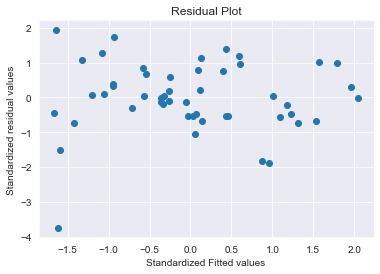

In [32]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [33]:
#Residual Vs Regressors

eval_env: 1


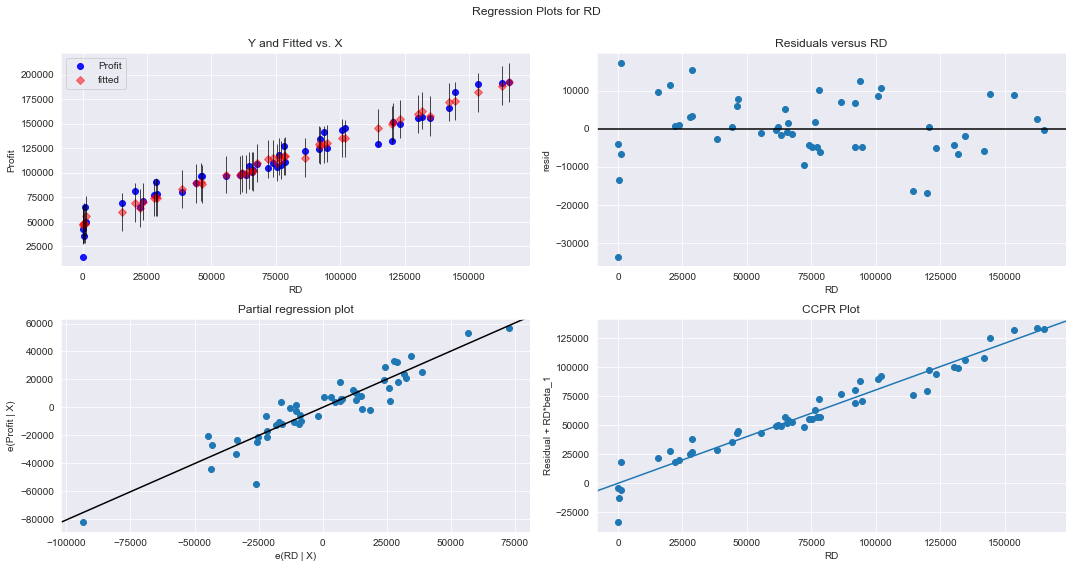

In [34]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RD", fig=fig)
plt.show()

eval_env: 1


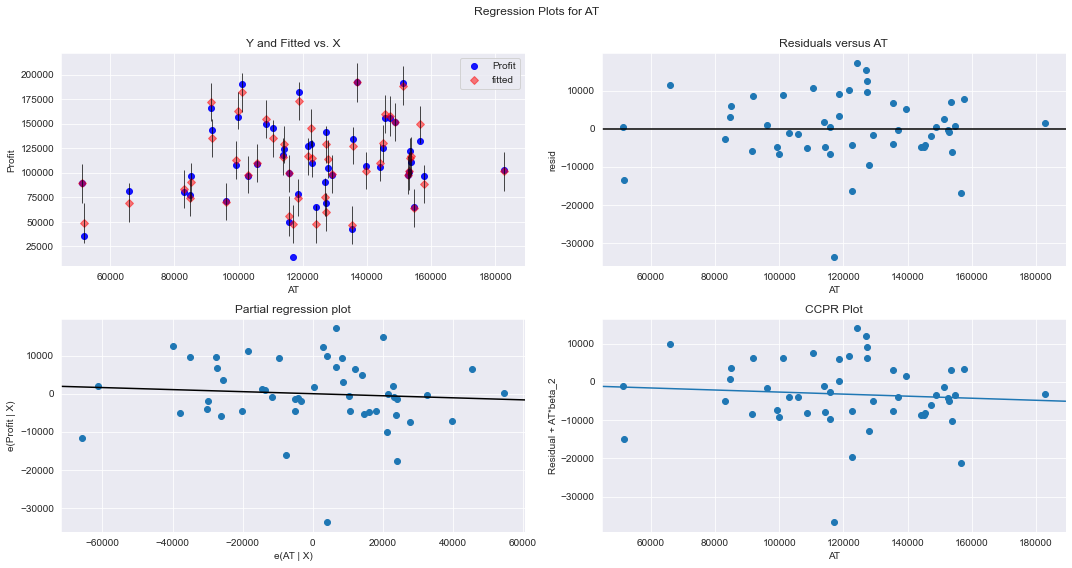

In [35]:
fig = plt.figure(figsize=(15,8))

fig = sm.graphics.plot_regress_exog(model, "AT", fig=fig)
plt.show()

eval_env: 1


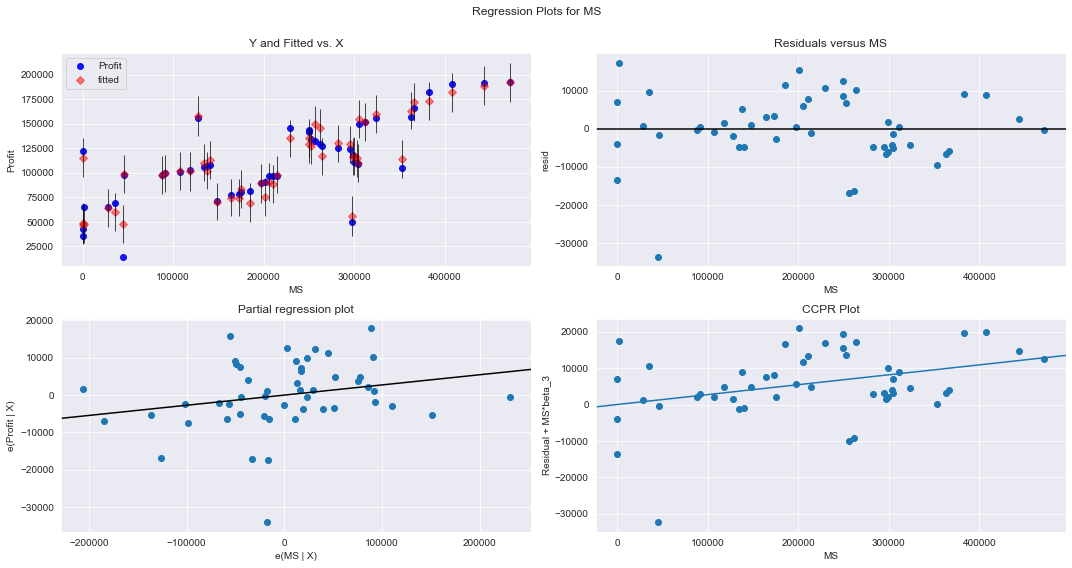

In [93]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "MS", fig=fig)
plt.show()

In [94]:
#Model Deletion Diagnostics

In [95]:
#Detecting Influencers/Outliers

In [96]:
#Cook’s Distance

In [97]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance


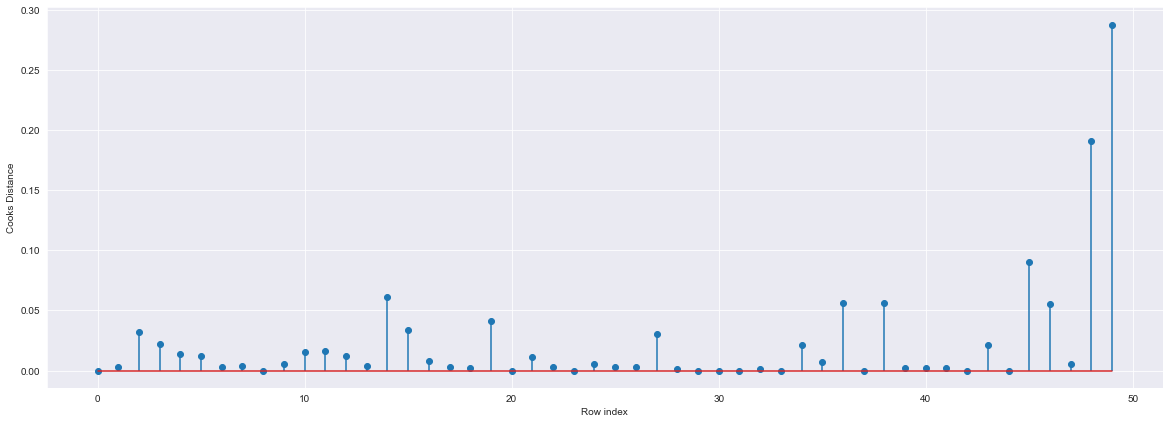

In [98]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 3))  
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [99]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c)) 

(49, 0.28808229275432634)

In [100]:
#High Influence points

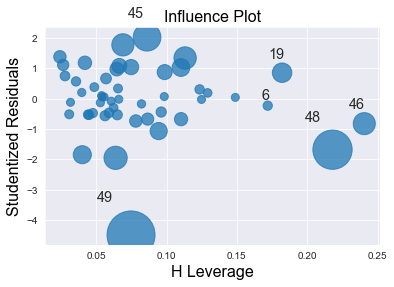

In [101]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [102]:
k = 3
n = df.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff 

0.24

In [103]:
#From the above plot, it is evident that data point 45 and 49 are the influencers¶

In [104]:
df[df.index.isin([45, 49])] 

,RD,AT,MS,S,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
49,0.00,116983.80,45173.06,California,14681.40


In [105]:
#See the differences in RD and other variable values
df.head()

,RD,AT,MS,S,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [106]:
#Improving the model

In [107]:
#Load the data
df1_new = pd.read_csv("50_Startups.csv")

In [108]:
#Discard the data points which are influencers and reasign the row number (reset_index())
df1=df1_new.drop(df1_new.index[[45,49]],axis=0).reset_index()  

In [109]:
#Drop the original index
df1=df1.drop(['index'],axis=1)  

In [110]:
df1  

,RD,AT,MS,S,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [111]:
# Build Model

In [112]:
#Exclude variable "AT" and generate R-Squared and AIC values
final_ml_M= smf.ols('Profit~RD+MS',data = df).fit() 

In [113]:
(final_ml_M.rsquared,final_ml_M.aic,final_ml_M.bic) 

(0.9504503015559763, 1057.070772191826, 1062.8068412081107)

In [114]:
#Exclude variable "MS" and generate R-Squared and AIC values
final_ml_A= smf.ols('Profit~AT+RD',data = df).fit() 

In [115]:
(final_ml_A.rsquared,final_ml_A.aic,final_ml_A.bic) 

(0.9478129385009173, 1059.6636934567293, 1065.3997624730139)

In [116]:
#Comparing above R-Square and AIC values, model 'final_ml_V' has high R- square and low AIC value hence include variable 'MS' so that multi collinearity problem would be resolved.

In [117]:
#Cook’s Distance

In [120]:
model_influence_M= final_ml_M.get_influence()
(c_M, _) = model_influence_M.cooks_distance

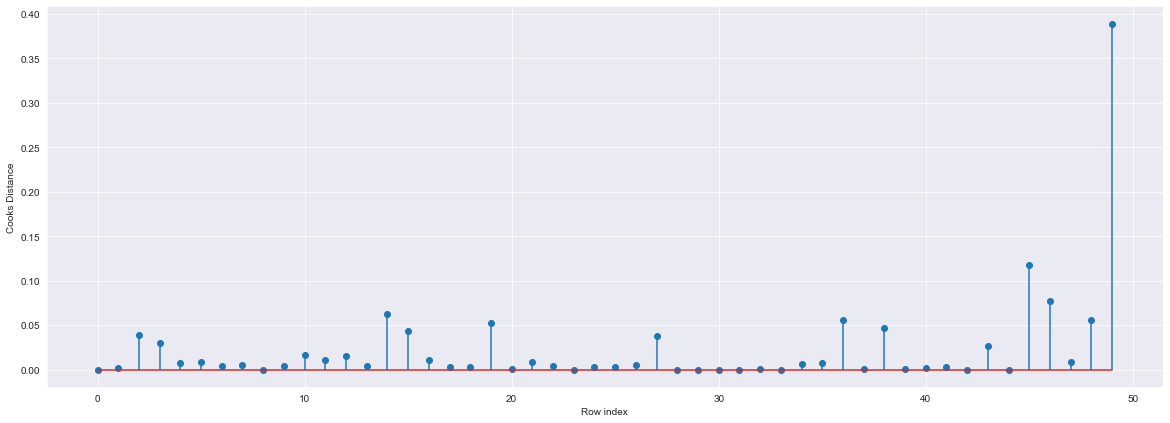

In [121]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.round(c_M,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [122]:
#index of the data points where c is more than .5
(np.argmax(c_M),np.max(c_M)) 

(49, 0.3894886227924922)

In [123]:
#Drop 45
df2=df1.drop(df.index[[45]],axis=0) 

In [124]:
df2 

,RD,AT,MS,S,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [125]:
#Reset the index and re arrange the row values
df3=df2.reset_index()  

In [126]:
df4=df3.drop(['index'],axis=1)

In [127]:
df4 

,RD,AT,MS,S,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [128]:
#Build the model on the new data
final_ml_v= smf.ols('Profit~RD+AT+MS',data = df4).fit()

In [129]:
#Again check for influencers
model_influence_v = final_ml_v.get_influence()
(c_v, _) = model_influence_v.cooks_distance

In [131]:
#Correlation Matrix

In [132]:
#index of the data points where c is more than .5
(np.argmax(c_v),np.max(c_v))

(46, 0.3689969488012905)

In [133]:
df5=df4.drop(df1.index[[46]],axis=0) 
df5  

,RD,AT,MS,S,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [134]:
df6=df5.reset_index() 
df6 
#car6=car5.drop(['index'],axis=1

,index,RD,AT,MS,S,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94
5,5,131876.90,99814.71,362861.36,New York,156991.12
6,6,134615.46,147198.87,127716.82,California,156122.51
7,7,130298.13,145530.06,323876.68,Florida,155752.60
8,8,120542.52,148718.95,311613.29,New York,152211.77
9,9,123334.88,108679.17,304981.62,California,149759.96


In [135]:
df7=df6.drop(['index'],axis=1) 
df7 

,RD,AT,MS,S,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [136]:
#Since the value is <1 , we can stop the diagnostic process and finalize the model


In [137]:
#Check the accuracy of the mode
final_ml_v= smf.ols('Profit~RD+AT+MS',data = df7).fit()


In [138]:
(final_ml_v.rsquared,final_ml_v.aic,final_ml_v.bic) 

(0.962593650298269, 950.0635928720131, 957.3781584579696)

In [142]:
model_influence_v= final_ml_v.get_influence() 

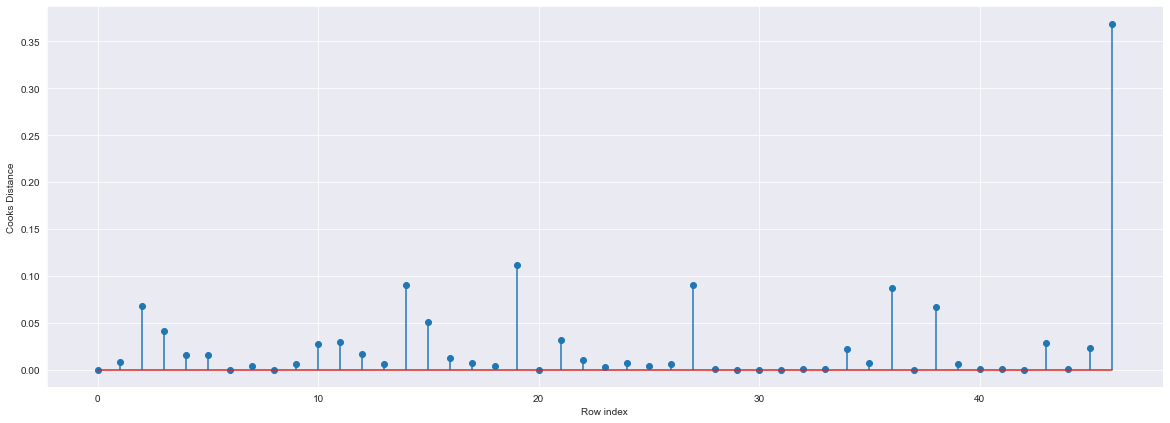

In [143]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.round(c_v,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [144]:
(np.argmax(c_v),np.max(c_v))

(46, 0.3689969488012905)

In [145]:
#Predicting for new data


In [146]:
#New data for prediction
new_data=pd.DataFrame({'RD':40,"AT":95,"MS":102,"ST":35},index=[1])

In [147]:
#Type Markdowaszzxn and LaTeX:  𝛼2

In [148]:
final_ml_v.predict(new_data)  

1    56924.325511
dtype: float64

In [149]:
final_ml_v.predict(df1_new.iloc[0:5,])  

0    190130.816082
1    186454.033293
2    181105.940730
3    172478.455896
4    171731.889275
dtype: float64

In [150]:
pred_y = final_ml_v.predict(df1_new)

In [151]:
pred_y 

0     190130.816082
1     186454.033293
2     181105.940730
3     172478.455896
4     171731.889275
5     163293.596350
6     156333.582943
7     158527.845161
8     150490.249670
9     154622.003463
10    135892.747070
11    136520.630139
12    129353.312991
13    127546.705225
14    148078.790426
15    145875.403771
16    117836.611892
17    129913.739743
18    129680.589848
19    115274.967305
20    117847.576718
21    117370.573803
22    115752.397504
23    111726.995236
24    114864.567380
25    103068.605246
26    110939.390996
27    115403.943556
28    101263.275850
29    102212.734351
30    101002.047454
31     98258.804621
32    100112.145051
33    100088.382611
34     90037.566390
35     93494.964961
36     77721.253491
37     93582.736764
38     74074.195105
39     87009.589892
40     77465.588069
41     78396.902643
42     74040.884976
43     62965.464205
44     66432.565336
45     51018.183229
46     59890.279108
47     49585.256517
48     54520.760435
49     51832.371084
